In [7]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import time

    
def DFTloop(x,N):
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s = s + x[n]*cmath.exp(complex(0,-(2*np.pi*k*n)/N))
        X.append(s)
    return (X)

def DFTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(cmath.exp(complex(0,-(2*np.pi*k*n)/N)))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return (X)

    
N=4
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
    
X=DFTmat(x,N)

print(X)

X=DFTloop(x,N)

print(X)
e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[ 2.98918052+2.11485554j -0.38248575+0.60061337j  0.34158688+0.49212604j
  0.44894204+0.57871957j]
[(2.9891805210325715+2.1148555425295283j), (-0.38248575395301676+0.6006133684854598j), (0.34158687728864645+0.49212603539026345j), (0.44894203998230775+0.5787195687154307j)]
7.4289322560545195


In [9]:
from __future__ import division
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
import cmath
import time

    
def DCTloop(x,N):
    X = []
    for k in range(N):
        s = 0
        for n in range(N):
            s = s + x[n]*np.cos(np.pi*k*(n+0.5)/N)
        X.append(s)
    return (X)

def DCTmat(x,N):
    W = []
    for k in range(N):
        w = []
        for n in range(N):
            w.append(np.cos(np.pi*k*(n+0.5)/N))
        W.append(w)
    W_ = np.array(W)
    x_ = np.array(x)
    X = np.matmul(W_,x_)
    return (X)

    
N=4
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
    
X=DCTmat(x,N)

print(X)

X=DCTloop(x,N)

print(X)
e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[ 1.55757512+1.58924881j  0.01500386-0.26427942j  0.30987978+0.25185413j
 -0.05405675-0.03786731j]
[(1.5575751170209609+1.5892488059719403j), (0.015003859636150918-0.2642794199704742j), (0.3098797751874146+0.25185412798448936j), (-0.054056747359170404-0.03786730902612148j)]
3.034329750131688


In [65]:
def haarMatrix(N):
    # Allow only size n of power 2
    N = 2**np.ceil(np.log2(N))
    if N > 2:
        h = haarMatrix(N / 2)
    else:
        return np.array([[1, 1], [1, -1]])

    # calculate upper haar part
    h_n = np.kron(h, [1, 1])
    # calculate lower haar part 
    h_i = np.kron(np.eye(len(h)), [1, -1])
    # combine parts
    h = np.vstack((h_n, h_i))
    return (h)

def Haar(x,N):
    W = []
    W = haarMatrix(N)
    x_ = np.array(x)
    X = np.matmul(W,x_)
    return (X)

N=8
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
    
X=Haar(x,N)

print(X)
e=0
for i in range(0,N-1,1):
    e=e+np.abs(x[i]-X[i])**2
print(e)

[ 3.24574233+3.78304524j -0.57236157+0.97741592j  1.06909983-0.11999742j
  0.2150446 -0.35663594j  0.22574515+0.39199681j -0.1017685 -0.36255668j
 -0.0729249 -0.30874892j  0.35311304+0.48050408j]
22.463066540986446


Text(0,0.5,'E(L)')

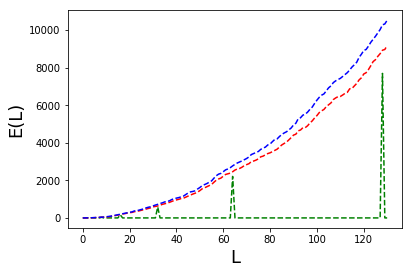

In [64]:
N=132
x_real = np.random.rand(N)
x_img = np.random.rand(N)
x = []
for i in range(N):
    x.append(complex(x_real[i],x_img[i]))
L= np.arange(N-1)
eX= np.zeros(N-1)
eY= np.zeros(N-1)
eZ= np.zeros(N-1)

for i in range(1,8,1):
    m=int(2**i)
    X=Haar(x[0:m],m)
    for j in range(0,m-1,1):
        eX[m]=eX[m]+np.abs(x[j]-X[j])**2

for i in range(1,N-1,1):
    Y=DCTmat(x[0:i],i)
    Z=DFTmat(x[0:i],i)
    for k in range(0,i-1,1):
        eY[i]=eY[i]+np.abs(x[k]-Y[k])**2
    for l in range(0,i-1,1):
        eZ[i]=eZ[i]+np.abs(x[l]-Z[l])**2


fig,ax = plt.subplots()
ax.plot(L,eX,'g--')
ax.plot(L,eY,'r--')
ax.plot(L,eZ,'b--')
ax.set_xlabel('L',fontsize = 18)
ax.set_ylabel('E(L)',fontsize = 18) 